In [1]:
from flat_bug.predictor import Predictor
import cv2
import os 
from os import listdir
from os.path import join
from PIL import Image 
from pathlib import Path 
import numpy as np 
import matplotlib.pyplot as plt
import torch

In [9]:
video_root = "/home/george/data/gijs/videos"
image_root = "/home/george/data/gijs/images"

In [2]:
# Load the model
model = Predictor(model = "flat_bug_L.pt", device="cuda:0", dtype="float16")

YOLOv8l-seg summary (fused): 313 layers, 41,738,835 parameters, 0 gradients, 200.5 GFLOPs


['/home/george/data/gijs/videos/Pterostichus(kootje)_20251101.mp4', '/home/george/data/gijs/videos/Pterostichus_20250107_1.mp4', '/home/george/data/gijs/videos/Pterostichus_20250107_2.mp4']


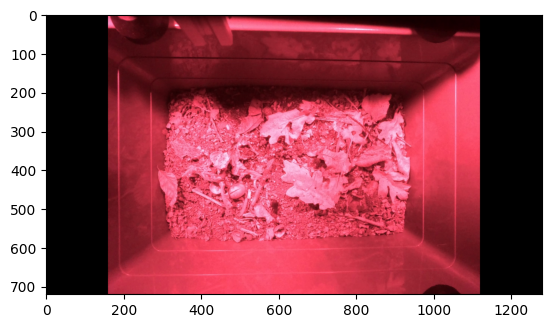

In [11]:
video_filenames = os.listdir(video_root)
video_paths = [join(video_root, f) for f in video_filenames]
print(video_paths)

# Get one frame
cap = cv2.VideoCapture(video_paths[0])
ret, frame = cap.read()
plt.imshow(frame)

In [17]:
def to_tensor(frame):
    image = torch.from_numpy(frame)
    image = image.permute(2, 0, 1)
    image = image.cuda()
    return image 

In [14]:
image = to_tensor(frame)
output = model(image)

In [15]:
output_dir = join(image_root, video_filenames[0])
os.makedirs(output_dir, exist_ok=True)
output_path = join(output_dir, "0.jpg")
output.plot(outpath=output_path)

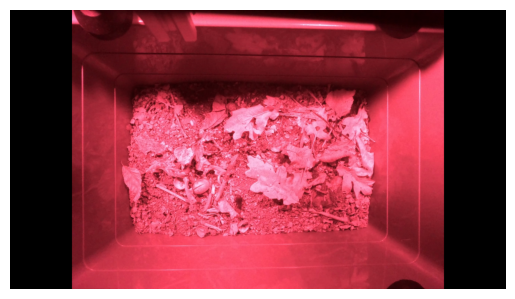

In [8]:
from matplotlib import pyplot as plt
plt.imshow(output.plot())
plt.axis("off")
plt.show()

Iterator over the video

In [16]:
def video_generator(path):
    """Iterate over a cv2.VideoCapture and gracefully stop when finised.
    """
    cap = cv2.VideoCapture(path)
    ret, frame = cap.read()
    yield frame
    while(1):
        ret, frame = cap.read()
        if cv2.waitKey(1) & 0xFF == ord('q') or ret==False :
            cap.release()
            cv2.destroyAllWindows()
            break
        yield frame 

In [18]:
# output dir
output_dir = join(image_root, video_filenames[0])
os.makedirs(output_dir, exist_ok=True)

for i, frame in enumerate(video_generator(video_paths[0])):
    image = to_tensor(frame)
    output = model(image)
    if len(output.crops) > 0:
        output_path = join(output_dir, f"{i}.jpg")
        output.plot(outpath=output_path)